In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Input, Conv2DTranspose
from keras.models import Sequential, Model
from keras.datasets import fashion_mnist

In [9]:
(train_x, _), (test_x, _) = fashion_mnist.load_data()
s_train_x = train_x.astype('float32') / 255.
s_test_x = test_x.astype('float32') / 255.

In [10]:
ec = Sequential()
ec.add(Flatten(input_shape = (28, 28)))
ec.add(Dense(64, activation = 'relu'))

de = Sequential()
de.add(Dense(784, activation = 'sigmoid'))
de.add(Reshape((28, 28)))
ec_d = ec(train_x)
out_d = de(ec_d)

In [11]:
class Auto_E(Model):
    def __init__(self):
        super().__init__()
        self.ec = Sequential([Flatten(), Dense(64, activation = 'relu')])
        self.de = Sequential([Dense(784, activation = 'sigmoid'), Reshape((28, 28))])

    def call(self, x):
        ec_d = self.ec(x)
        out_d = self.de(ec_d)
        return out_d
auto_e = Auto_E()  

In [12]:
auto_e.compile(loss = 'mse', optimizer = 'adam')

In [13]:
auto_e.fit(s_train_x, s_train_x, epochs = 10, shuffle = True,
           validation_data = (s_test_x, s_test_x))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [14]:
ec_img = auto_e.ec(s_test_x).numpy()
out_img = auto_e.de(ec_img).numpy()
out_img.shape

(10000, 28, 28)

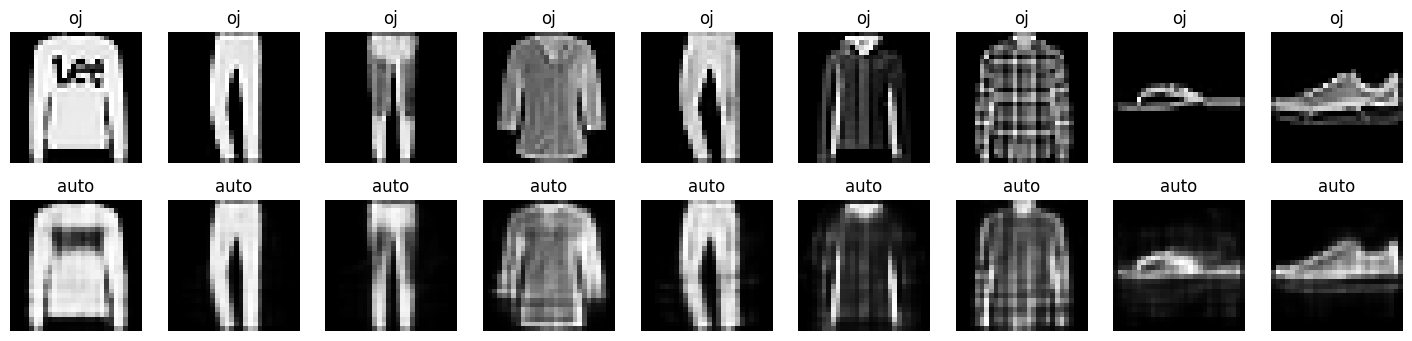

In [15]:
plt.figure(figsize = (20, 4))
for i in range(1, 10):
    ax = plt.subplot(2, 10, i)
    plt.imshow(s_test_x[i])
    plt.title("oj")
    plt.gray()
    plt.axis("off")

    ax = plt.subplot(2, 10, i + 10)
    plt.imshow(out_img[i])
    plt.title('auto')
    plt.gray()
    plt.axis('off')
plt.show()

In [16]:
im_tr_x = s_train_x[..., tf.newaxis]
im_tt_x = s_test_x[..., tf.newaxis]

In [17]:
class Auto_E_img(Model):
    def __init__(self):
        super().__init__()
        self.ec = Sequential([Input(shape = (28, 28, 1)),
                                    Conv2D(16, 3, padding = 'same', activation = 'relu'),
                                    Conv2D(8, 3, padding = 'same', activation = 'relu')])
        self.de = Sequential([Conv2DTranspose(8, 3, padding = 'same', activation = 'relu'),
                              Conv2DTranspose(16, 3, padding = 'same', activation = 'relu'),
                              Conv2D(1, 3, padding = 'same', activation = 'sigmoid')])

    def call(self, x):
        ec_d = self.ec(x)
        out_d = self.de(ec_d)
        return out_d
n_auto_e = Auto_E_img()

In [18]:
n_auto_e.compile(loss = 'mse', optimizer = 'adam')

In [19]:
n_auto_e.fit(im_tr_x, im_tr_x, epochs = 10, shuffle = True,
             validation_data = (im_tt_x, im_tt_x))

Epoch 1/10
1875/1875 [==============================] - 99s 52ms/step - loss: 0.0042 - val_loss: 5.1820e-04
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 3.5188e-04 - val_loss: 1.7136e-04
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 1.4043e-04 - val_loss: 9.1854e-05
Epoch 4/10
1875/1875 [==============================] - 90s 48ms/step - loss: 9.5658e-05 - val_loss: 6.9848e-05
Epoch 5/10
1875/1875 [==============================] - 88s 47ms/step - loss: 7.4359e-05 - val_loss: 6.9231e-05
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 6.3545e-05 - val_loss: 7.4858e-05
Epoch 7/10
1875/1875 [==============================] - 93s 50ms/step - loss: 5.5145e-05 - val_loss: 4.0755e-05
Epoch 8/10
1875/1875 [==============================] - 90s 48ms/step - loss: 4.5815e-05 - val_loss: 4.7371e-05
Epoch 9/10
1875/1875 [==============================] - 90s 48ms/step - loss: 3.7534e-05 - val_loss: 2.8679e

In [20]:
ec_img = auto_e.ec(im_tt_x).numpy()
out_img = auto_e.de(ec_img).numpy()
out_img.shape

(10000, 28, 28)

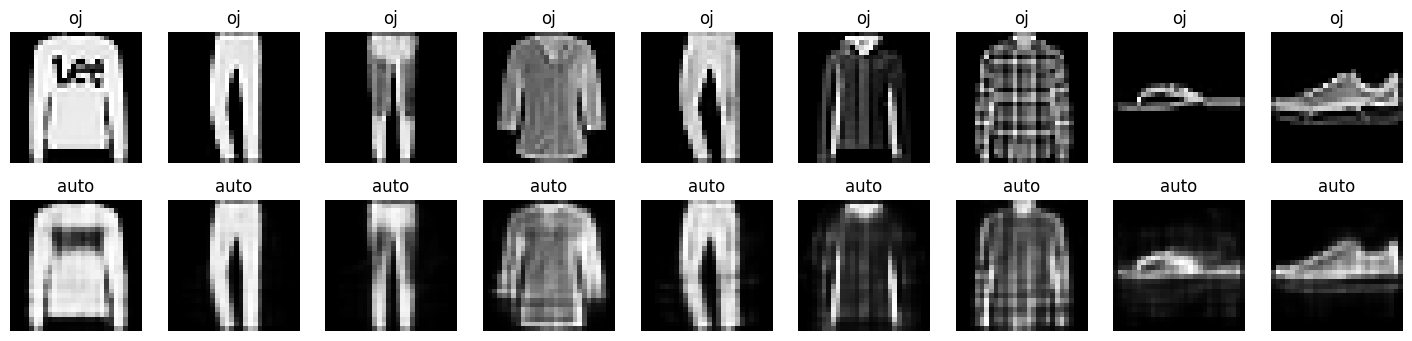

In [21]:
plt.figure(figsize = (20, 4))
for i in range(1, 10):
    ax = plt.subplot(2, 10, i)
    plt.imshow(tf.squeeze(im_tt_x[i]))
    plt.title("oj")
    plt.gray()
    plt.axis("off")

    ax = plt.subplot(2, 10, i + 10)
    plt.imshow(tf.squeeze(out_img[i]))
    plt.title('auto')
    plt.gray()
    plt.axis('off')
plt.show()

In [22]:
ap = 0.2
ck_img = im_tt_x + ap * tf.random.normal(shape = im_tt_x.shape)

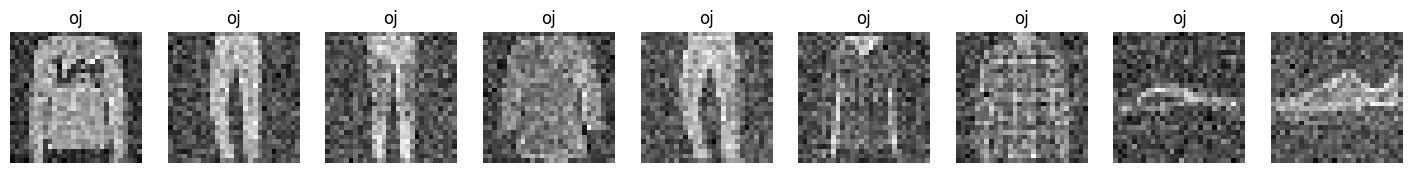

In [23]:
plt.figure(figsize = (20, 4))
for i in range(1, 10):
    ax = plt.subplot(2, 10, i)
    plt.imshow(tf.squeeze(ck_img[i]))
    plt.title("oj")
    plt.gray()
    plt.axis("off")
plt.show()

Q. noise가 있는 이미지를 tensorflow로

In [24]:
ap = 0.2
n_train_img = im_tr_x + ap * tf.random.normal(shape = im_tr_x.shape)
n_test_img = im_tt_x + ap * tf.random.normal(shape = im_tt_x.shape)

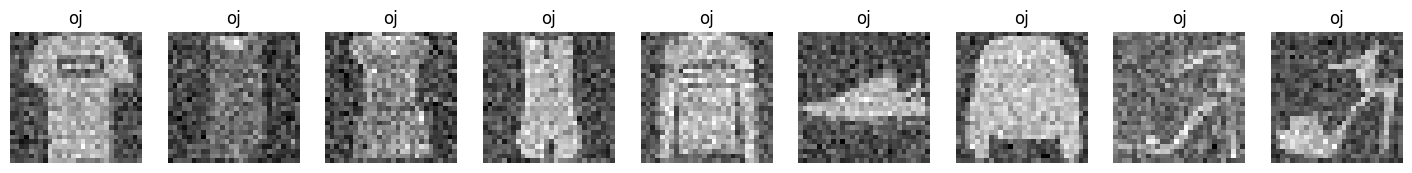

In [25]:
plt.figure(figsize = (20, 4))
for i in range(1, 10):
    ax = plt.subplot(2, 10, i)
    plt.imshow(tf.squeeze(n_train_img[i]))
    plt.title("oj")
    plt.gray()
    plt.axis("off")
plt.show()

In [26]:
class Auto_E_n_img(Model):
    def __init__(self):
        super().__init__()
        self.ec = Sequential([Input(shape = (28, 28, 1)),
                                    Conv2D(16, 3, padding = 'same', activation = 'relu'),
                                    Conv2D(8, 3, padding = 'same', activation = 'relu')])
        self.de = Sequential([Conv2DTranspose(8, 3, padding = 'same', activation = 'relu'),
                              Conv2DTranspose(16, 3, padding = 'same', activation = 'relu'),
                              Conv2D(1, 3, padding = 'same', activation = 'sigmoid')])

    def call(self, x):
        ec_d = self.ec(x)
        out_d = self.de(ec_d)
        return out_d
auto_e_n_img = Auto_E_n_img()

In [27]:
auto_e_n_img.compile(loss = 'mse', optimizer = 'adam')

In [28]:
auto_e_n_img.fit(n_train_img, n_train_img, epochs = 10, shuffle = True,
             validation_data = (n_test_img, n_test_img))

Epoch 1/10
1875/1875 [==============================] - 94s 49ms/step - loss: 0.0190 - val_loss: 0.0136
Epoch 2/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0134 - val_loss: 0.0128
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 5/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 6/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 8/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 9/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 10/10
1875/1875 [==============================] - 81s 43m

In [29]:
ec_img = auto_e.ec(n_test_img).numpy()
out_img = auto_e.de(ec_img).numpy()

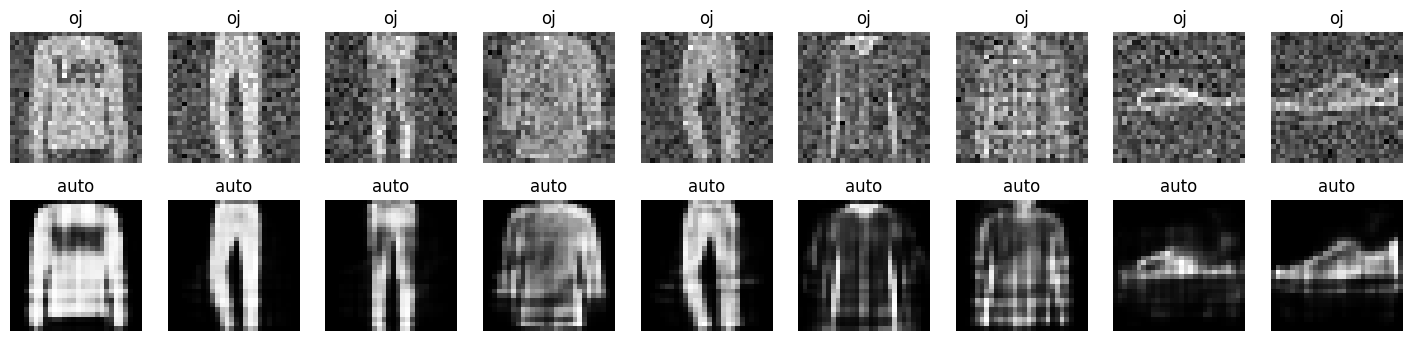

In [30]:
plt.figure(figsize = (20, 4))
for i in range(1, 10):
    ax = plt.subplot(2, 10, i)
    plt.imshow(tf.squeeze(n_test_img[i]))
    plt.title("oj")
    plt.gray()
    plt.axis("off")

    ax = plt.subplot(2, 10, i + 10)
    plt.imshow(tf.squeeze(out_img[i]))
    plt.title('auto')
    plt.gray()
    plt.axis('off')
plt.show()

Q 노이즈가 있는 이미지를 CNN 방식으로

In [31]:
ap=0.2
n_tr_img=im_tr_x + ap*tf.random.normal(shape=im_tr_x.shape)
n_tt_img=im_tt_x + ap*tf.random.normal(shape=im_tt_x.shape)
#0~1
s_n_tr_img=tf.clip_by_value(n_tr_img,clip_value_min=0.,clip_value_max=1.)
s_n_tt_img=tf.clip_by_value(n_tt_img,clip_value_min=0.,clip_value_max=1.)

In [32]:
class Denoise(Model):
  def __init__(self):
    super().__init__()
    self.ec=Sequential([Input(shape=(28,28,1)),
                        Conv2D(16,3,padding='same',activation='relu'),
                        Conv2D(8,3,padding='same',activation='relu')])
    self.de=Sequential([Conv2DTranspose(8,3,padding='same',activation='relu'),
                        Conv2DTranspose(16,3,padding='same',activation='relu'),
                        Conv2D(1,3,padding='same',activation='sigmoid')])


  def call(self,x):
    ec_d=self.ec(x)
    out_d=self.de(ec_d)
    return out_d
denoise_m=Denoise()

In [33]:
denoise_m.compile(loss='mse',optimizer='adam')

In [34]:
denoise_m.fit(s_n_tr_img,im_tr_x,epochs=5,shuffle=True,validation_data=(s_n_tt_img,im_tt_x))

Epoch 1/5


1875/1875 [==============================] - 82s 44ms/step - loss: 0.0104 - val_loss: 0.0064
Epoch 2/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 4/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0054 - val_loss: 0.0054


In [35]:
ec_img=denoise_m.ec(s_n_tt_img).numpy()
out_img=denoise_m.de(ec_img).numpy()
out_img.shape

(10000, 28, 28, 1)

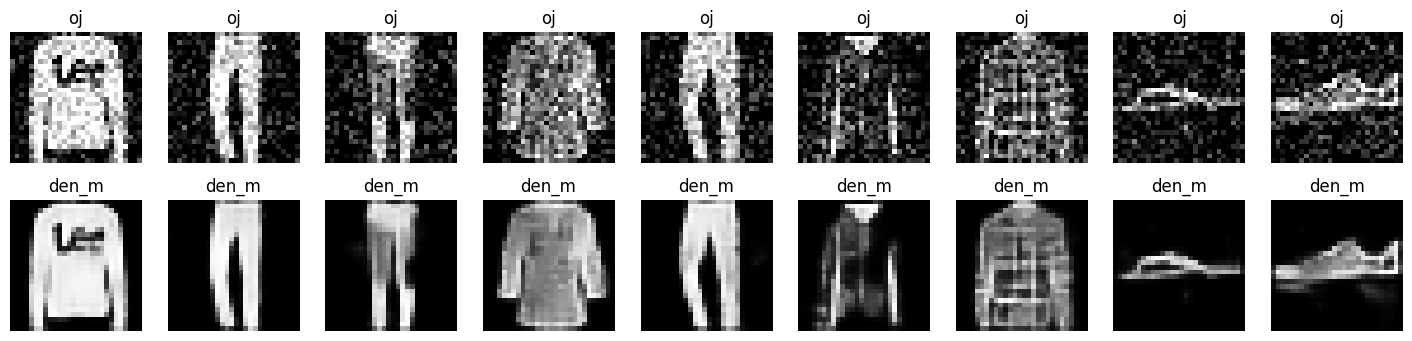

In [36]:
plt.figure(figsize=(20,4))
for i in range(1,10):
  ax=plt.subplot(2,10,i)
  plt.imshow(tf.squeeze(s_n_tt_img[i]))
  plt.title("oj")
  plt.gray()
  plt.axis('off')

  ax=plt.subplot(2,10,i+10)
  plt.imshow(tf.squeeze(out_img[i]))
  plt.title("den_m")
  plt.gray()
  plt.axis('off')
plt.show()

In [37]:
from keras.utils import to_categorical
(tr_x,tr_y),(tt_x,tt_y)=fashion_mnist.load_data()
s_tr_x=(tr_x.astype('float32')/255.)[...,tf.newaxis]
s_tt_x=(tt_x.astype('float32')/255.)[...,tf.newaxis]
s_tr_y=to_categorical(tr_y)
s_tt_y=to_categorical(tt_y)
s_tr_x.shape,s_tr_y.shape,s_tt_x.shape,s_tt_y.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [38]:
cnn=Sequential([Input(shape=(28,28,1)),
                Conv2D(16,3,padding='same',activation='relu'),
                Conv2D(8,3,padding='same',activation='relu'),
                Flatten(),
                Dense(10,activation='softmax')])
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics='acc')

In [39]:
cnn.fit(s_tr_x,s_tr_y,epochs=20,validation_data=(s_tt_x,s_tt_y))

Epoch 1/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4313 - acc: 0.8469 - val_loss: 0.3481 - val_acc: 0.8752
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3048 - acc: 0.8909 - val_loss: 0.3345 - val_acc: 0.8815
Epoch 3/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2628 - acc: 0.9053 - val_loss: 0.3096 - val_acc: 0.8910
Epoch 4/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2327 - acc: 0.9158 - val_loss: 0.2842 - val_acc: 0.8961
Epoch 5/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2087 - acc: 0.9246 - val_loss: 0.2847 - val_acc: 0.8984
Epoch 6/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1894 - acc: 0.9311 - val_loss: 0.2878 - val_acc: 0.9005
Epoch 7/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1737 - acc: 0.9370 - val_loss: 0.2896 - val_acc: 0.8995
Epoch 8/20
1875/1875 [==========================

In [40]:
cnn.evaluate(s_tt_x, s_tt_y)

  1/313 [..............................] - ETA: 12s - loss: 1.0139 - acc: 0.9375

313/313 [==============================] - 1s 4ms/step - loss: 0.4495 - acc: 0.8965


[0.4495387673377991, 0.8964999914169312]

In [41]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms

import json
from PIL import Image
import matplotlib.pyplot as plt

모델 로드

In [42]:
m = models.resnet101(pretrained = True)

c:\Users\gjaischool\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gjaischool\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [43]:
m.eval()
print(m)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [44]:
CLASSN = json.load(open('imagenet_classes.json'))
idx2class = [CLASSN[str(i)] for i in range(1000)]
idx2class

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

img_로드

In [45]:
img = Image.open('img1.jpg')

In [46]:
img_tr = transforms.Compose([
    transforms.Resize((224, 224), Image.BICUBIC),
    transforms.ToTensor()
])
img_t = img_tr(img)
img_t = img_t.unsqueeze(0)
img_t.size()

torch.Size([1, 3, 224, 224])

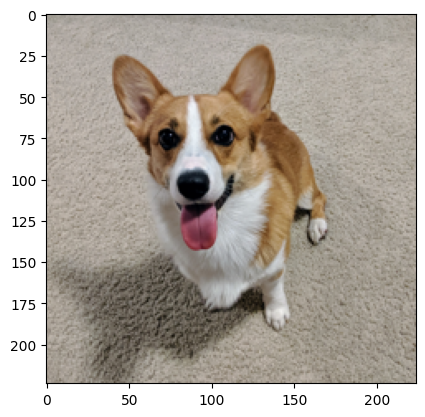

In [47]:
plt.imshow(img_t.squeeze(0).transpose(0, 2).transpose(0, 1).numpy())

In [48]:
out_img = m(img_t)
p_idx = out_img.max(1, keepdim = False)[1].item()
p_n = idx2class[p_idx]
print(f"class : {p_idx}, name : {p_n}")

class : 263, name : Pembroke, Pembroke Welsh corgi


적대적 공격

In [49]:
def at_f(img, es, gr):
    # 기울기 도출
    sign_data = gr.sign()
    # 기울기 변환
    pr_img = img + sign_data * es
    # 범위 조절
    ac_img = torch.clamp(pr_img, 0, 1)
    return ac_img

In [50]:
# 이미지의 기울기 값을 구하도록 활성화
img_t.requires_grad_(True)
out_data = m(img_t)

loss = F.nll_loss(out_data, torch.tensor([263]))

m.zero_grad()
loss.backward()

gr = img_t.grad.data # 이미지의 기울기값

es = 0.03
n_img = at_f(img_t, es, gr)
out_data = m(n_img)

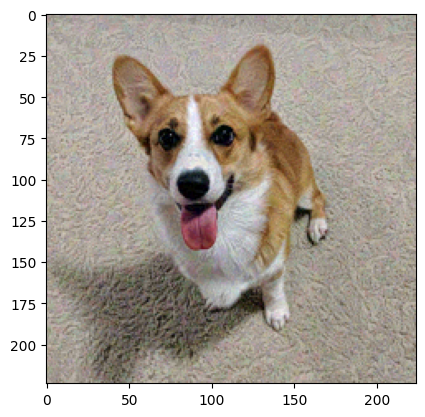

In [51]:
plt.imshow(n_img.squeeze(0).detach().transpose(0, 2).transpose(0, 1).numpy())

VAE

In [52]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [53]:
s_train_x = train_x.astype('float') / 255.
s_test_x = test_x.astype('float') / 255.
s_train_x = s_train_x.reshape(-1, 28 * 28)
s_test_x = s_test_x.reshape(-1, 28 * 28)

In [54]:
from keras.layers import Dense, Lambda
from keras.models import Sequential
from keras.backend import random_normal, exp, shape

ec = Sequential()
ec.add(Dense(2, activation = 'relu', input_shape = (784,)))
ed_d = ec(s_train_x)
mean = Dense(2)(ed_d)
log_var = Dense(2)(ed_d)

In [55]:
def sampling(data):
    mean, log_var = data
    es = random_normal(mean = 0, stddev = 1., shape = (shape(log_var)[0], 2))
    return mean + exp(log_var / 2) * es

sp = Lambda(sampling, output_shape = (2,))([mean, log_var])

In [56]:
de_m = Sequential()
de_m.add(Dense(784, activation = 'sigmoid', input_shape = (2,)))

In [57]:
de_m.output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_13')>

In [58]:
vae = Sequential([ec, de_m])
vae.summary(),vae,input,vae.output

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 2)                 1570      
                                                                 
 sequential_17 (Sequential)  (None, 784)               2352      
                                                                 
Total params: 3922 (15.32 KB)
Trainable params: 3922 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(None,
 <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x0000019FE3F14D90>>,
 <KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'sequential_17')>)

In [59]:
from keras.layers import Dense, Lambda
from keras.models import Sequential
from keras.backend import random_normal, exp, shape

ec_input = Sequential()
ec_input.add(Dense(2, activation = 'relu', input_shape = (784,)))
ed_d = ec(s_train_x)
mean = Dense(2)(ed_d)
log_var = Dense(2)(ed_d)

In [60]:
from keras.losses import binary_crossentropy
bc_loss = binary_crossentropy(ec_input, de_m)
bc_loss *= 784
kl_loss = mean(1 + log_var - square(mean) -exp(log_var) * es)
loss = mean(kl_loss, bc_loss)
vae.add_loss(loss)

ValueError: Attempt to convert a value (<keras.src.engine.sequential.Sequential object at 0x0000019FABE83C70>) with an unsupported type (<class 'keras.src.engine.sequential.Sequential'>) to a Tensor.

In [ ]:
import tensorflow as tf
l_loss = -0.5 * tf.reduce_sum(1 + log_var - square(mean) - exp(log_var), axis = -1)
vae.add_loss(tf.reduce_mean(l_loss) / 784.)
# vae.compile(loss = 'binary_crossentropy') # 베르누이분포
vae.compile(loss = 'mse') # 가우시안분포